In [ ]:
# libraries
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
import numpy as  np
import os
import pandas as pd

In [1]:
# save partial correlation fc matrix
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17, resolution_mm=2, data_dir=None, base_url=None, resume=True, verbose=1)
atlas_filename = dataset.maps
#labels = dataset.labels
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
subs = ['105','106','108', '113', '115', '117', '120', '122', '123', '125']
correlation_measure = ConnectivityMeasure(kind='partial correlation')

for sub in range(0,10):
    os.chdir('/data/UIUC/sub-' + subs[sub] + '/ses-A/func')

    for pt in range(1,4):
        img = nib.load('sub-' + subs[sub] + '_ses-A_task-rest_run-' + str(pt) + '_bold.nii.gz')
        if pt == 1:
            run1 = masker.fit_transform(img)
            correlation_matrix1 = correlation_measure.fit_transform([run1])[0]
        elif pt == 2:
            run2 = masker.fit_transform(img)          
            correlation_matrix2 = correlation_measure.fit_transform([run1])[0]
        elif pt == 3:
            run3 = masker.fit_transform(img)
            correlation_matrix3 = correlation_measure.fit_transform([run3])[0]
    os.chdir('/data/hcp_working_folder/tdhore2/UIUC/ses-A')
    np.savez('fc_pc_' + subs[sub], run1 = correlation_matrix1, run2 = correlation_matrix2, run3 = correlation_matrix3)

/home/tdhore2/miniconda3/envs/hcp_env/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:462: UserWarning: After resampling the label image to the data image, the following labels were removed: {52.0}. Label image only contains 100 labels (including background).
  warnings.warn("After resampling the label image to the "


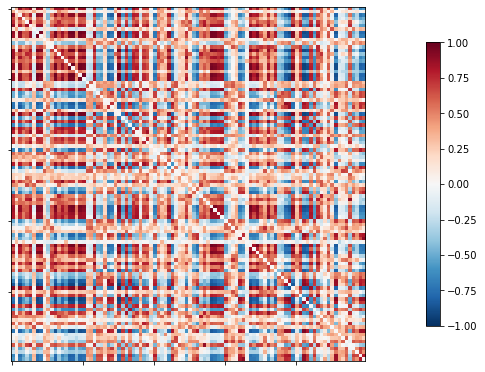

In [1]:
# plotting matrix
os.chdir('/data/hcp_working_folder/tdhore2/UIUC/ses-A')
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)
subs = ['105','106','108', '113', '115', '117', '120', '122', '123', '125', '126', '129', '130']

npzfile = np.load('fc_108.npz')
run1 = npzfile['run1']
run2 = npzfile['run2']
run3 = npzfile['run3']
    
np.fill_diagonal(run1, 0)
plotting.plot_matrix(run1, colorbar=True, vmax=1.0, vmin=-1.0)

In [53]:
# take only values of upper half of matrix
def upper(df):
    '''Returns the upper triangle of a correlation matrix.
    You can use scipy.spatial.distance.squareform to recreate matrix from upper triangle.
    Args:
      df: pandas or numpy correlation matrix
    Returns:
      list of values from upper triangle
    '''
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

SpearmanrResult(correlation=0.7666684144908621, pvalue=0.0)


Text(0, 0.5, 'Prevalence')

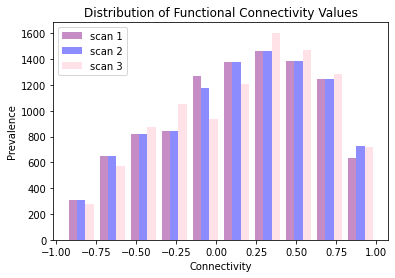

In [6]:
# plot fc matrix values
cm1 = run1.flatten()
cm2 = run2.flatten() 
cm3 = run3.flatten()
avg_mtx = (run1 + run2 + run3) / 3
cm_avg = avg_mtx.flatten()

plt.hist((cm1,cm2,cm3), bins=10, alpha=0.45, color=('purple','blue','pink'))
plt.legend(['scan 1','scan 2','scan 3'])
plt.title('Distribution of Functional Connectivity Values')
plt.xlabel('Connectivity')
plt.ylabel('Prevalence')
